In [1]:
#importlibraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
myfile = pd.read_csv('C:/Users/Lenovo/Downloads/VN_tf.csv')

In [3]:
myfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203588 entries, 0 to 1203587
Data columns (total 15 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Length                           1203588 non-null  float64
 1   Info                             1203588 non-null  float64
 2   Transmission Rate (per 1000 ms)  1203588 non-null  float64
 3   Reception Rate (per 1000 ms)     1203588 non-null  float64
 4   TR / RR                          1203588 non-null  float64
 5   Sources Count Per Sec            1203588 non-null  float64
 6   Destinations Count Per Sec       1203588 non-null  float64
 7   Trans Total Duration Per Sec     1203588 non-null  float64
 8   Rcv Total Duration Per Sec       1203588 non-null  float64
 9   Trans Average Per Sec            1203588 non-null  float64
 10  Rcv Average Per Sec              1203588 non-null  float64
 11  DAO                              1203588 non-null 

In [4]:
myfile.head(5)

,Length,Info,Transmission Rate (per 1000 ms),Reception Rate (per 1000 ms),TR / RR,Sources Count Per Sec,Destinations Count Per Sec,Trans Total Duration Per Sec,Rcv Total Duration Per Sec,Trans Average Per Sec,Rcv Average Per Sec,DAO,DIS,DIO,Label
0,0.0,0.491786,0.437764,0.764212,0.27632,0.438505,0.755007,0.482277,0.729485,0.685771,0.459108,0.0,1.0,0.0,1
1,0.0,0.491786,0.437764,0.764212,0.27632,0.438505,0.755007,0.482277,0.729485,0.685771,0.459108,0.0,1.0,0.0,1
2,0.0,0.491786,0.437764,0.764212,0.27632,0.438505,0.755007,0.482277,0.729485,0.685771,0.459108,0.0,1.0,0.0,1
3,0.0,0.491786,0.437764,0.764212,0.27632,0.438505,0.755007,0.482277,0.729485,0.685771,0.459108,0.0,1.0,0.0,1
4,0.0,0.491786,0.437764,0.764212,0.27632,0.438505,0.755007,0.482277,0.729485,0.685771,0.459108,0.0,1.0,0.0,1


In [5]:
#target value "Label"
x = myfile.drop(["Label"],axis = 1)
y = myfile["Label"]

In [6]:
y.value_counts()

0    700262
1    503326
Name: Label, dtype: int64

<AxesSubplot:ylabel='Label'>

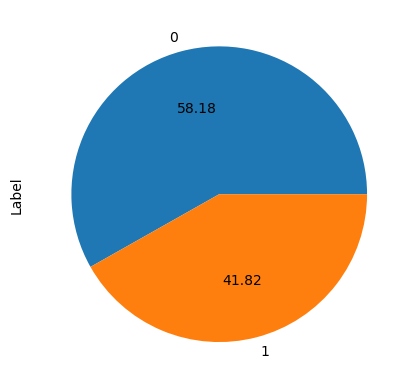

In [7]:
#show pie plot
y.value_counts().plot.pie(autopct = "%.2f")

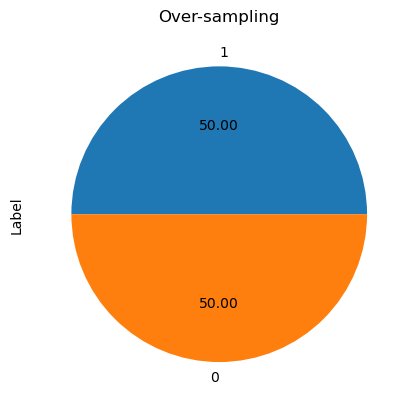

In [8]:
#oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 1) 
x_res, y_res = ros.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")



In [9]:
y_res.value_counts()

1    700262
0    700262
Name: Label, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(myfile)
scaled_data = scaler.transform(myfile)
scaled_data

array([[-2.54561245,  0.27347281, -0.62670888, ...,  7.56834237,
        -0.90499267,  1.17952078],
       [-2.54561245,  0.27347281, -0.62670888, ...,  7.56834237,
        -0.90499267,  1.17952078],
       [-2.54561245,  0.27347281, -0.62670888, ...,  7.56834237,
        -0.90499267,  1.17952078],
       ...,
       [ 0.09505121,  0.54815145, -2.96956151, ..., -0.13771317,
        -0.90499267, -0.84780193],
       [ 0.09505121,  0.54815145, -1.19466474, ..., -0.13771317,
        -0.90499267, -0.84780193],
       [ 0.09505121,  0.54815145, -0.94934724, ..., -0.13771317,
        -0.90499267, -0.84780193]])

In [12]:
#Feature extraction method
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
scaled_data.shape

(1203588, 15)

In [13]:
x_pca.shape

(1203588, 5)

In [14]:
scaled_data

array([[-2.54561245,  0.27347281, -0.62670888, ...,  7.56834237,
        -0.90499267,  1.17952078],
       [-2.54561245,  0.27347281, -0.62670888, ...,  7.56834237,
        -0.90499267,  1.17952078],
       [-2.54561245,  0.27347281, -0.62670888, ...,  7.56834237,
        -0.90499267,  1.17952078],
       ...,
       [ 0.09505121,  0.54815145, -2.96956151, ..., -0.13771317,
        -0.90499267, -0.84780193],
       [ 0.09505121,  0.54815145, -1.19466474, ..., -0.13771317,
        -0.90499267, -0.84780193],
       [ 0.09505121,  0.54815145, -0.94934724, ..., -0.13771317,
        -0.90499267, -0.84780193]])

In [15]:
x_pca

array([[ 4.26077707, -4.41718544,  1.54838291,  4.05036127,  1.00811201],
       [ 4.26077707, -4.41718544,  1.54838291,  4.05036127,  1.00811201],
       [ 4.26077707, -4.41718544,  1.54838291,  4.05036127,  1.00811201],
       ...,
       [ 4.72411493,  1.61048588, -0.52548109,  2.39709991,  0.27786658],
       [ 3.10370013,  0.76332661, -2.17651529,  0.34417095,  0.3406197 ],
       [ 2.26302443,  0.36654723, -1.01738171,  0.25341042,  0.64880693]])

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)

# Create a K-NN classifier
knn = KNeighborsClassifier(n_neighbors=14)
start_time = time.time()
knn.fit(X_train, y_train)

training_time = time.time() - start_time
start_time = time.time()

# Get predictions for the test set
y_pred = knn.predict(X_test)

# Get the testing time
testing_time = time.time() - start_time

print("Training time: ", training_time)
print("Testing time: ", testing_time)

D:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training time:  5.523246765136719
Testing time:  13.32784366607666


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Get predictions for the test set
y_pred = knn.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute the recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute the F1-score
F1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", F1)


D:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.9999709203300127
Precision:  0.9999709217834771
Recall:  0.9999709203300127
F1-score:  0.999970920187888


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9950772272950091
